In [11]:
# prosperous due diligence notebook
# much borrowed from derek cheung @derekcheung
# his code here https://t.co/HBUJiW6vmJ
# this version stays in the notebook and goes through some elements which we look at (as we would on BB)
# Thanks, Alex. 
# links 
# YT: https://www.youtube.com/channel/UCSgE2RSSMXPK1antbEeJ9lg
# Twitter: 𝙰𝚕𝚎𝚡𝚊𝚗𝚍𝚛𝚎 𝙵𝚞𝚌𝚑𝚜 (@urbanscribesays) / https://twitter.com/urbanscribesays


import os
import io
import sys
import warnings
import datetime
import numpy as np
import base64
import dotenv

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

from IPython.display import HTML

from openbb_terminal.reports import widget_helpers as widgets
from openbb_terminal.sdk import openbb
from openbb_terminal import config_terminal as cfg
from openbb_terminal.helper_classes import TerminalStyle
from openbb_terminal.core.config.paths import USER_ENV_FILE, REPOSITORY_DIRECTORY
import yfinance as yf
import pandas as pd

from jinja2 import Template

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
warnings.filterwarnings("ignore")

In [12]:

symbol = "CHGG"
similar_companies = ["BFAM","LOPE", "GHC","DUOL"]


universe = [symbol] + similar_companies

In [13]:
ticker_data = openbb.stocks.load(
    symbol=symbol, start_date=datetime.datetime.now() - datetime.timedelta(days=18 * 30)
)
ticker_data = openbb.stocks.process_candle(data=ticker_data)

author = ""
report_title = f"Due Dili on {symbol.upper()}"
report_date = datetime.datetime.now().strftime("%d %B, %Y")
report_time = datetime.datetime.now().strftime("%H:%M")
report_timezone = datetime.datetime.now(datetime.timezone.utc).astimezone().tzinfo
report_title, report_date, report_time, report_timezone

Loading Daily data for CHGG with starting period 2021-08-16.

('Due Dili on CHGG',
 '07 February, 2023',
 '11:08',
 datetime.timezone(datetime.timedelta(days=-1, seconds=68400), 'EST'))

In [14]:
(
    df_year_estimates,
    df_quarter_earnings,
    df_quarter_revenues,
) = openbb.stocks.dd.est(symbol=symbol)
df_quarter_revenues

,Previous Quarter,Current Quarter,Next Quarter,Current Year,Next Year
QUARTER REVENUES ESTIMATES,,,,,
Date,ending 12/31/22,ending 03/31/23,ending 06/30/23,ending 12/31/23,ending 12/31/24
No. of Analysts,11,10,10,16,9
Average Estimate,202 USD,200 USD,208 USD,818 USD,890 USD
Year Ago,207 USD,202 USD,195 USD,-,818 USD
Publish Date,2/6/2023,5/1/2023,8/7/2023,-,-


In [15]:
df_year_estimates

,2023,2024,2025
YEARLY ESTIMATES,,,
Revenue,818,890,"1,177"
Dividend,-,0.00,-
Dividend Yield (in %),-,-,-
EPS,1.40,1.61,1.91
P/E Ratio,15.24,13.27,11.18
EBIT,34,67,-
EBITDA,275,310,420
Net Profit,206,240,131
Net Profit Adjusted,205,238,-


In [16]:
df_institutional_shareholders = openbb.stocks.fa.shrs(symbol, holder="institutional")
df_institutional_shareholders.index += 1
df_institutional_shareholders

,Holder,Shares,Date Reported,Stake,Value
1,Baillie Gifford and Company,17.930 M,2022-12-30,14.29 %,307.850 M
2,"Vanguard Group, Inc. (The)",11.767 M,2022-09-29,9.38 %,202.033 M
3,Blackrock Inc.,8.740 M,2022-09-29,6.97 %,150.062 M
4,"Sands Capital Management, LLC",5.378 M,2022-09-29,4.29 %,92.332 M
5,Capital Research Global Investors,5.180 M,2022-09-29,4.13 %,88.935 M
6,"Fred Alger Management, LLC",3.193 M,2022-09-29,2.54 %,54.828 M
7,"Shaw D.E. & Co., Inc.",2.664 M,2022-09-29,2.12 %,45.747 M
8,State Street Corporation,2.661 M,2022-09-29,2.12 %,45.696 M
9,"ClearBridge Investments, LLC",2.638 M,2022-09-29,2.10 %,45.302 M
10,Artisan Partners Limited Partnership,2.595 M,2022-09-29,2.07 %,44.550 M


In [17]:
df_rating = openbb.stocks.dd.rating(symbol)
df_rating

,Rating,DCF,ROE,ROA,DE,PE,PB
date,,,,,,,
2023-02-06,Strong Buy,Strong Buy,Buy,Buy,Buy,Buy,Strong Buy
2023-02-03,Strong Buy,Strong Buy,Buy,Buy,Buy,Buy,Strong Buy
2023-02-02,Strong Buy,Strong Buy,Buy,Buy,Buy,Buy,Strong Buy
2023-02-01,Strong Buy,Strong Buy,Buy,Buy,Buy,Buy,Strong Buy
2023-01-31,Strong Buy,Strong Buy,Buy,Buy,Buy,Buy,Strong Buy
...,...,...,...,...,...,...,...
2014-04-04,Neutral,Buy,Neutral,Neutral,Neutral,Strong Sell,Strong Buy
2014-04-03,Neutral,Buy,Neutral,Neutral,Neutral,Strong Sell,Strong Buy
2014-04-02,Neutral,Buy,Neutral,Neutral,Neutral,Strong Sell,Strong Buy


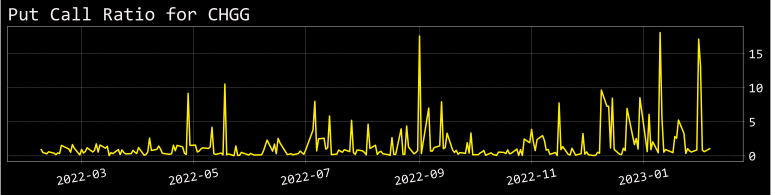

In [18]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.options.pcr_chart(
    symbol,
    window=30,
    external_axes=[
        ax,
    ],
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
pcr_chart = f.getvalue().decode("utf-8")

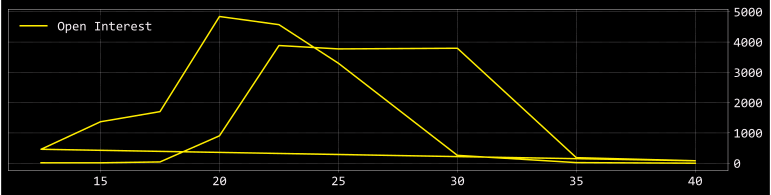

In [19]:
expiry_dates = openbb.stocks.options.expirations(symbol)
if (len(expiry_dates) > 0):
    exp = expiry_dates[0]
    option_chain = openbb.stocks.options.chains(symbol, expiration=exp)
else:
    option_chain = pd.DataFrame()


if not option_chain.empty:
    fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
    ax.plot(
        option_chain["strike"], option_chain["openInterest"], label="Open Interest"
    )
    ax.legend()
    fig.tight_layout()
    f = io.BytesIO()
    fig.savefig(f, format="svg")
    vol_chart = f.getvalue().decode("utf-8")

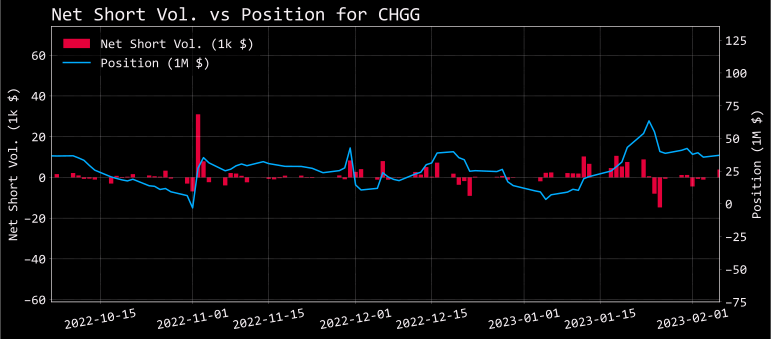

In [20]:
fig, ax1 = plt.subplots(figsize=(11, 5), dpi=150)
ax2 = ax1.twinx()
openbb.stocks.dps.spos_chart(
    symbol=symbol,
    limit=84,
    raw=False,
    export="",
    external_axes=[ax1, ax2],
)
fig.tight_layout()

f = io.BytesIO()
fig.savefig(f, format="svg")
net_short_position = f.getvalue().decode("utf-8")

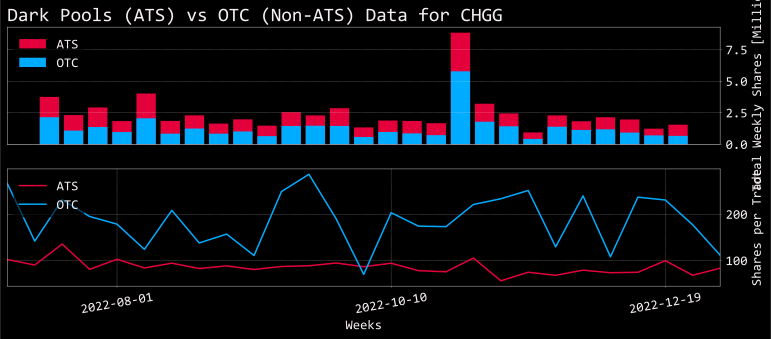

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
openbb.stocks.dps.dpotc_chart(symbol=symbol, external_axes=[ax1, ax2])
fig.tight_layout()

f = io.BytesIO()
fig.savefig(f, format="svg")
dark_pools = f.getvalue().decode("utf-8")

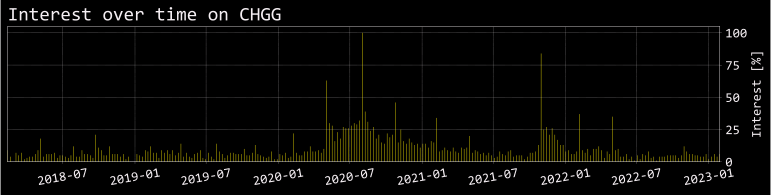

In [22]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.ba.mentions_chart(
    symbol,
    external_axes=[
        ax,
    ],
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
google_mentions_chart = f.getvalue().decode("utf-8")

In [125]:
openbb.stocks.fa.metrics(symbol)

Fiscal Date Ending,2022,2021,2020,2019,2018
Period,FY,FY,FY,FY,FY
Revenue per share,5.298,5.363,5.140,3.447,2.835
Net income per share,1.842,-0.010,-0.050,-0.081,-0.131
Operating cash flow per share,0.002,1.888,1.886,0.951,0.663
Free cash flow per share,0.001,1.161,0.770,0.596,0.388
Cash per share,7.307,10.680,9.137,6.448,4.132
Book value per share,7.714,7.647,4.863,4.185,3.626
Tangible book value per share,2.923,5.365,2.179,2.094,2.077
Shareholders equity per share,7.714,7.647,4.863,4.185,3.626
Interest debt per share,8.346,11.773,12.755,7.973,2.604


In [23]:
valuation_comparison = openbb.stocks.ca.screener(universe, "valuation")
valuation_comparison = valuation_comparison.drop(columns=['EPS next 5Y', 'PEG', 'Sales past 5Y'])
valuation_comparison['Market Cap']=valuation_comparison['Market Cap'].apply(lambda x: "${0:.0f} M".format(x/1000000))

valuation_comparison = valuation_comparison.style.format({"EPS this Y": "${:,.2f}", "EPS next Y": "${:,.2f}", "EPS past 5Y": "${:,.2f}", 
                                                          "P/E": "{:,.2f}", "Fwd P/E":"{:,.2f}", "P/S": "{:,.2f}" , "P/B": "{:,.2f}" , 
                                                          "P/C":"{:,.2f}", "P/FCF": "{:,.2f}"} 
                                                        )
                                                      
#valuation_comparison['EPS this Y']=valuation_comparison['EPS this Y'].apply(lambda x: "${:,.2f}".format(x))

valuation_comparison

,Ticker,Market Cap,P/E,Fwd P/E,P/S,P/B,P/C,P/FCF,EPS this Y,EPS next Y,EPS past 5Y,Price,Change,Volume
0,BFAM,$4480 M,57.35,25.12,2.30,4.51,137.54,41.29,$1.59,$0.20,$-0.06,76.700000,-0.013600,45535.000000
1,CHGG,$2580 M,10.67,15.67,3.36,2.53,2.75,10.64,$0.79,$-0.05,$0.53,17.220000,-0.181400,9260872.000000
2,DUOL,$4200 M,nan,nan,12.39,7.38,6.99,114.36,$-4.84,$0.11,$nan,95.810000,-0.033200,200407.000000
3,GHC,$3210 M,22.52,13.07,0.86,0.75,4.22,32.22,$0.21,$-0.14,$0.19,660.940000,-0.008400,768.000000
4,LOPE,$3600 M,20.76,18.48,3.98,6.12,33.22,19.89,$0.09,$0.07,$0.13,111.270000,-0.037900,49263.000000


In [167]:
hist_ratios = openbb.stocks.fa.ratios(symbol)
hist_ratios = hist_ratios.iloc[:, ::-1]
hist_ratios

Fiscal Date Ending,2018,2019,2020,2021,2022
Period,FY,FY,FY,FY,FY
Current ratio,8.294,11.308,10.780,14.191,8.241
Quick ratio,8.056,10.928,10.556,13.675,7.785
Cash ratio,6.279,5.428,4.373,7.469,3.411
Days of sales outstanding,14.475,10.240,7.315,8.393,11.192
Days of inventory outstanding,0,0,0,0,0
Operating cycle,14.475,10.240,7.315,8.393,11.192
Days of payables outstanding,37.309,29.150,15.187,17.171,22.868
Cash conversion cycle,-22.835,-18.910,-7.872,-8.778,-11.676
Gross profit margin,0.751,0.776,0.681,0.672,0.743


In [169]:
hist_ratios = openbb.stocks.fa.ratios(symbol)
hist_ratios = hist_ratios.iloc[:, ::-1]
hist_ratios = hist_ratios.loc[["Price to book ratio", "Price to sales ratio", "Price earnings ratio","Price sales ratio","Enterprise value multiple"], :]
hist_ratios

Fiscal Date Ending,2018,2019,2020,2021,2022
Price to book ratio,9.559,9.965,19.590,3.187,2.739
Price to sales ratio,12.225,12.097,18.534,4.544,3.988
Price earnings ratio,-263.654,-517.523,-1.920 K,-2.419 K,11.471
Price sales ratio,12.225,12.097,18.534,4.544,3.988
Enterprise value multiple,186.384,80.568,101.645,50.372,8.698


In [ ]:
hist_ratios = openbb.stocks.fa.ratios(symbol)
hist_ratios = hist_ratios.iloc[:, ::-1]
hist_ratios = hist_ratios.loc[["Gross profit margin", "Pretax profit margin", "Net profit margin"], :]
hist_ratios

In [149]:
a = openbb.stocks.ca.screener
dir(a)
help(a)

Help on Operation in module openbb_terminal.core.library.operation:

<openbb_terminal.core.library.operation.Operation object>
    Screener Overview.
    
    Parameters
    ----------
    similar:
        List of similar companies.
        Comparable companies can be accessed through
        finnhub_peers(), finviz_peers(), polygon_peers().
    data_type : str
        Data type between: overview, valuation, financial, ownership, performance, technical
    
    Returns
    -------
    pd.DataFrame
        Dataframe with overview, valuation, financial, ownership, performance or technical



In [26]:
financial_comparison = openbb.stocks.ca.screener(universe, "valuation")
# financial_comparison = financial_comparison.drop(columns=['Change'])


financial_comparison['Market Cap'] = financial_comparison['Market Cap'].apply(lambda x: '{:,.0f}'.format(x/1000))
financial_comparison['Volume'] = financial_comparison['Volume'].apply(lambda x: '{:,.0f}'.format(x/1000))
financial_comparison['EPS next 5Y']=financial_comparison['EPS next 5Y'].apply(lambda x: "{0:.1f}%".format(x*100))
financial_comparison['Sales past 5Y']=financial_comparison['Sales past 5Y'].apply(lambda x: "{0:.1f}%".format(x*100))

# financial_comparison['Market Cap']=financial_comparison['Market Cap'].apply(lambda x: "{0:0f}".format(x*100))
financial_comparison

,Ticker,Market Cap,P/E,Fwd P/E,PEG,P/S,P/B,P/C,P/FCF,EPS this Y,EPS next Y,EPS past 5Y,EPS next 5Y,Sales past 5Y,Price,Change,Volume
0,BFAM,"4,480,000",57.35,25.12,2.46,2.30,4.51,137.54,41.29,1.586,0.1964,-0.059,23.3%,2.3%,76.70,-0.0136,46
1,CHGG,"2,580,000",10.67,15.67,0.53,3.36,2.53,2.75,10.64,0.792,-0.0529,0.533,20.0%,25.0%,17.22,-0.1814,"9,261"
2,DUOL,"4,200,000",NaN,NaN,NaN,12.39,7.38,6.99,114.36,-4.838,0.1070,NaN,20.0%,nan%,95.81,-0.0332,200
3,GHC,"3,210,000",22.52,13.07,1.24,0.86,0.75,4.22,32.22,0.212,-0.1389,0.188,18.1%,5.1%,660.94,-0.0084,1
4,LOPE,"3,600,000",20.76,18.48,NaN,3.98,6.12,33.22,19.89,0.086,0.0730,0.134,nan%,0.5%,111.27,-0.0379,49


In [111]:
bs = openbb.stocks.fa.balance(symbol)
bs = bs.applymap(lambda x: "{:,}".format(int(round(x))))

bs

,2021-12-31,2020-12-31,2019-12-31
Breakdown,,,
Cash and cash equivalents,"854,078,000","479,853,000","387,520,000"
Other short-term investments,"691,781,000","665,567,000","381,074,000"
Total cash,"1,545,859,000","1,145,420,000","768,594,000"
Net receivables,"17,850,000","12,913,000","11,529,000"
Other current assets,"23,846,000","11,846,000","16,606,000"
Total current assets,"1,622,648,000","1,182,955,000","807,267,000"
"Gross property, plant and equipment","344,654,000","282,792,000","170,886,000"
Accumulated depreciation,"-145,413,000","-98,610,000","-67,596,000"
"Net property, plant and equipment","199,241,000","184,182,000","103,290,000"


In [126]:
bs = openbb.stocks.fa.balance(symbol)
bs = bs.loc[['Total cash', 'Long-term debt'], :]

# # # Calculate the Net debt
bs.loc['Net debt'] = bs.loc['Long-term debt'] - bs.loc['Total cash']
bs = bs.applymap(lambda x: "{:,}".format(int(round(x))))


bs


,2021-12-31,2020-12-31,2019-12-31
Breakdown,,,
Total cash,"1,545,859,000","1,145,420,000","768,594,000"
Long-term debt,"1,678,155,000","1,506,922,000","900,303,000"
Net debt,"132,296,000","361,502,000","131,709,000"


In [78]:
openbb.stocks.ca.cashflow(universe, timeframe="2021")

Other available yearly timeframes are: 2017, 2018, 2019, 2020, 2021

,CHGG,BFAM,LOPE,GHC,DUOL
Item,,,,,
Net Income before Extraordinaries,(1.46M),70.46M,260.34M,353.33M,(60.14M)
Net Income Growth,76.56%,161.04%,1.22%,17.79%,-281.18%
"Depreciation, Depletion & Amortization",74.13M,108.83M,30.41M,203.04M,2.73M
Depreciation and Depletion,60.43M,79.66M,21.44M,145.17M,2.03M
Amortization of Intangible Assets,13.7M,29.17M,8.97M,57.87M,693K
Deferred Taxes & Investment Tax Credit,-,(5M),5.67M,65.05M,-
Deferred Taxes,-,(5M),5.67M,65.05M,-
Investment Tax Credit,-,-,-,-,-
Other Funds,205.66M,43.86M,7.2M,(308.98M),40.8M


In [123]:
financial_comparison = openbb.stocks.ca.screener(universe, "financial")
# financial_comparison = financial_comparison.drop(columns=['Change', 'Volume', 'Earnings', 'Price','Market Cap'])
# financial_comparison['Dividend']=financial_comparison['Dividend'].apply(lambda x: "{0:.1f}%".format(x*100))

financial_comparison['Market Cap'] = financial_comparison['Market Cap'].apply(lambda x: '{:,.0f}'.format(x))


financial_comparison['ROA']=financial_comparison['ROA'].apply(lambda x: "{0:.1f}%".format(x*100))
financial_comparison['ROE']=financial_comparison['ROE'].apply(lambda x: "{0:.1f}%".format(x*100))
financial_comparison['ROI']=financial_comparison['ROI'].apply(lambda x: "{0:.1f}%".format(x*100))
financial_comparison['Gross M']=financial_comparison['Gross M'].apply(lambda x: "{0:.1f}%".format(x*100))
financial_comparison['Oper M']=financial_comparison['Oper M'].apply(lambda x: "{0:.1f}%".format(x*100))
financial_comparison['Profit M']=financial_comparison['Profit M'].apply(lambda x: "{0:.1f}%".format(x*100))
# financial_comparison= financial_comparison.fillna("")
#financial_comparison = financial_comparison.rename(columns={'Gross M': 'Gross Margin', 'Oper M': 'Operating Margin', 'Profit M': 'Profit Margin'})
financial_comparison

,Ticker,Market Cap,Dividend,ROA,ROE,ROI,Curr R,Quick R,LTDebt/Eq,Debt/Eq,Gross M,Oper M,Profit M,Earnings,Price,Change,Volume
0,BFAM,"4,480,000,000",NaN,2.2%,7.2%,4.9%,0.4,0.4,0.97,1.10,24.3%,7.7%,4.1%,Nov 01/a,76.93,-0.0107,128970.0
1,CHGG,"2,580,000,000",NaN,10.9%,30.6%,-0.3%,7.2,7.2,1.13,0.00,73.8%,15.7%,37.6%,Feb 06/a,16.95,-0.1940,12243922.0
2,DUOL,"4,200,000,000",NaN,-9.2%,-12.1%,-11.7%,4.3,4.3,0.00,0.00,73.0%,-19.0%,-18.6%,Feb 28/a,95.61,-0.0352,291711.0
3,GHC,"3,210,000,000",0.0099,2.0%,3.3%,-0.3%,1.4,1.3,0.14,0.18,32.8%,4.5%,3.9%,Nov 02/b,654.63,-0.0179,3027.0
4,LOPE,"3,600,000,000",NaN,21.4%,27.0%,20.2%,2.3,2.3,0.00,0.00,54.8%,27.6%,22.0%,Feb 16/a,113.65,-0.0173,99219.0


In [29]:
ownership_comparison = openbb.stocks.ca.screener(universe, "ownership")
ownership_comparison = ownership_comparison.drop(columns=['Market Cap', 'Change', 'Volume', 'Avg Volume', 'Price'])
ownership_comparison= ownership_comparison.fillna("")

#format them a bit
ownership_comparison['Float'] = ownership_comparison['Float'].apply(lambda x: '{:,.0f}'.format(x))
ownership_comparison['Outstanding'] = ownership_comparison['Outstanding'].apply(lambda x: '{:,.0f}'.format(x))

ownership_comparison



,Ticker,Outstanding,Float,Insider Own,Insider Trans,Inst Own,Inst Trans,Float Short,Short Ratio
0,BFAM,"57,660,000","57,070,000",0.0040,-0.0149,,-0.0831,0.0201,2.59
1,CHGG,"126,130,000","122,770,000",0.0210,-0.0160,0.975,-0.0334,0.0364,2.50
2,DUOL,"39,750,000","30,180,000",0.0140,0.8984,0.831,-0.0011,0.0618,4.90
3,GHC,"4,810,000","3,390,000",0.0030,-0.0069,0.818,-0.0081,0.0187,3.04
4,LOPE,"31,300,000","30,540,000",0.0206,-0.0025,,0.0046,0.0205,2.91


In [30]:
performance_comparison = openbb.stocks.ca.screener(universe, "performance")
performance_comparison = performance_comparison.drop(columns=['Rel Volume', 'Avg Volume', 'Price','Change','Volume'])
performance_comparison['Perf Week']=performance_comparison['Perf Week'].apply(lambda x: "{0:.1f}%".format(x*100))
performance_comparison['Perf Month']=performance_comparison['Perf Month'].apply(lambda x: "{0:.1f}%".format(x*100))
performance_comparison['Perf Quart']=performance_comparison['Perf Quart'].apply(lambda x: "{0:.1f}%".format(x*100))
performance_comparison['Perf Half']=performance_comparison['Perf Half'].apply(lambda x: "{0:.1f}%".format(x*100))
performance_comparison['Perf Year']=performance_comparison['Perf Year'].apply(lambda x: "{0:.1f}%".format(x*100))
performance_comparison['Perf YTD']=performance_comparison['Perf YTD'].apply(lambda x: "{0:.1f}%".format(x*100))
performance_comparison= performance_comparison.fillna("")
performance_comparison

,Ticker,Perf Week,Perf Month,Perf Quart,Perf Half,Perf Year,Perf YTD,Volatility W,Volatility M,Recom
0,BFAM,-0.1%,10.3%,17.2%,-4.1%,-41.1%,21.6%,0.0314,0.0303,2.3
1,CHGG,-17.1%,-33.0%,-33.5%,-23.3%,-34.6%,-31.9%,0.0483,0.0502,2.7
2,DUOL,0.3%,32.9%,20.0%,0.1%,4.7%,34.7%,0.0525,0.0436,2.1
3,GHC,1.2%,6.4%,3.3%,13.4%,14.4%,9.4%,0.0199,0.0194,4.0
4,LOPE,-4.5%,-1.8%,9.8%,34.0%,35.8%,5.3%,0.0210,0.0207,1.7


In [31]:
try:
    df_related_queries = openbb.stocks.ba.queries(symbol)
    df_related_queries.index += 1
    df_related_queries.index
except:
    pass

try:
    df_rising_queries = openbb.stocks.ba.rise(symbol)
    df_rising_queries.index += 1
    df_rising_queries
except:
    pass

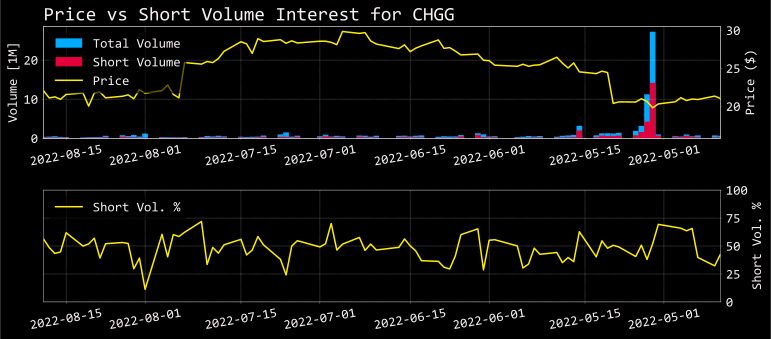

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
ax3 = ax1.twinx()
openbb.stocks.dps.psi_sg_chart(
    symbol=symbol,
    external_axes=[ax1, ax2, ax3],
)
fig.tight_layout()

f = io.BytesIO()
fig.savefig(f, format="svg")
price_vs_short_interest = f.getvalue().decode("utf-8")

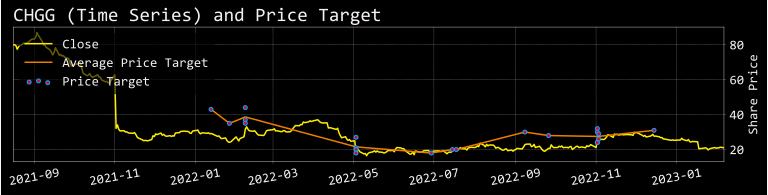

In [33]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.dd.pt_chart(
    symbol=symbol,
    start_date="2022-01-01",
    data=ticker_data,
    limit=10,
    raw=False,
    external_axes=[ax],
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
price_target_chart = f.getvalue().decode("utf-8")

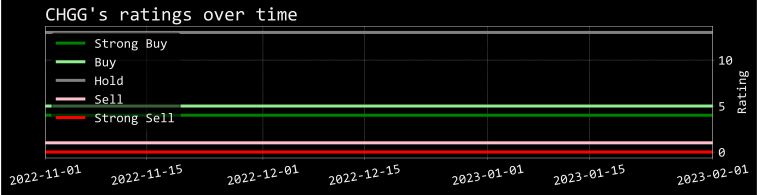

In [34]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.dd.rot_chart(
    symbol=symbol,
    limit=10,
    raw=False,
    export="",
    external_axes=[ax],
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
ratings_over_time_chart = f.getvalue().decode("utf-8")

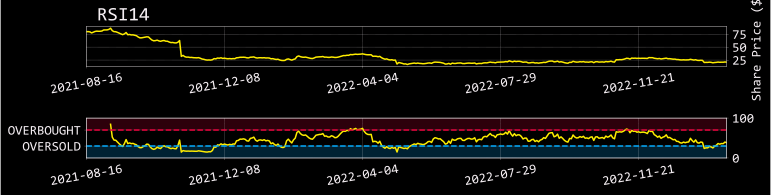

In [35]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 3), dpi=150)
openbb.ta.rsi_chart(ticker_data["Close"], external_axes=[ax1, ax2])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
ta_rsi = f.getvalue().decode("utf-8")

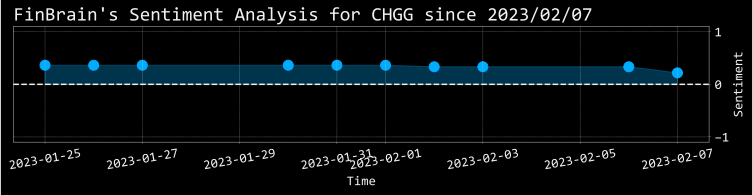

In [36]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.ba.headlines_chart(symbol=symbol, external_axes=[ax])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
finbrain_sentiment = f.getvalue().decode("utf-8")

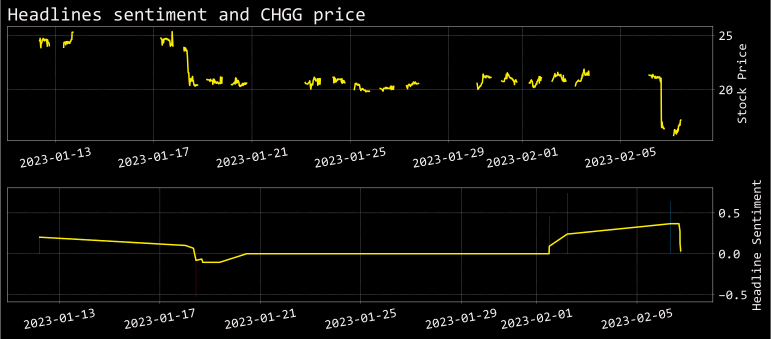

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
openbb.stocks.ba.snews_chart(symbol, external_axes=[ax1, ax2])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
snews = f.getvalue().decode("utf-8")

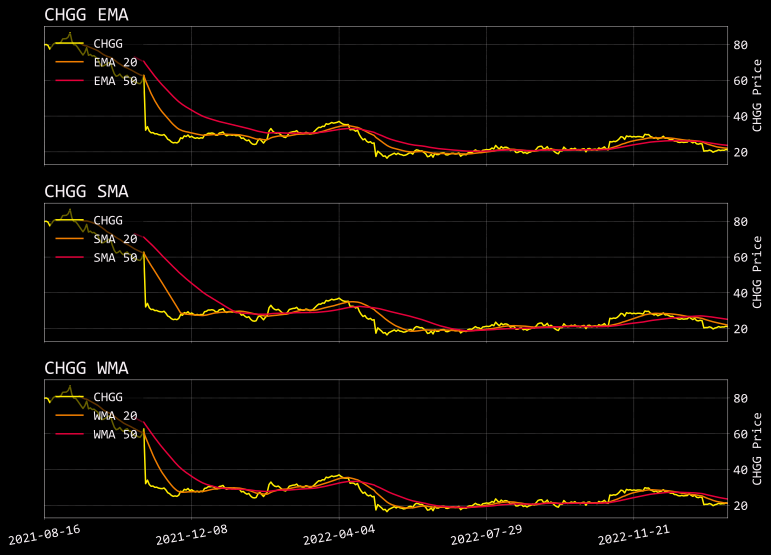

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=3, ncols=1, figsize=(11, 8), sharex=True, dpi=150
)
openbb.ta.ma(ticker_data["Close"], symbol=symbol, external_axes=[ax1])
openbb.ta.ma(ticker_data["Close"], symbol=symbol, ma_type="SMA", external_axes=[ax2])
openbb.ta.ma(ticker_data["Close"], symbol=symbol, ma_type="WMA", external_axes=[ax3])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
ma_chart = f.getvalue().decode("utf-8")

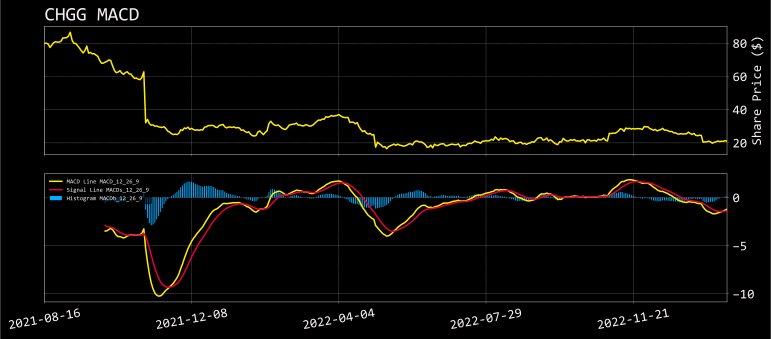

In [39]:
fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), sharex=True, dpi=150)
openbb.ta.macd_chart(ticker_data["Close"], symbol=symbol, external_axes=[ax, ax1])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
macd_chart = f.getvalue().decode("utf-8")

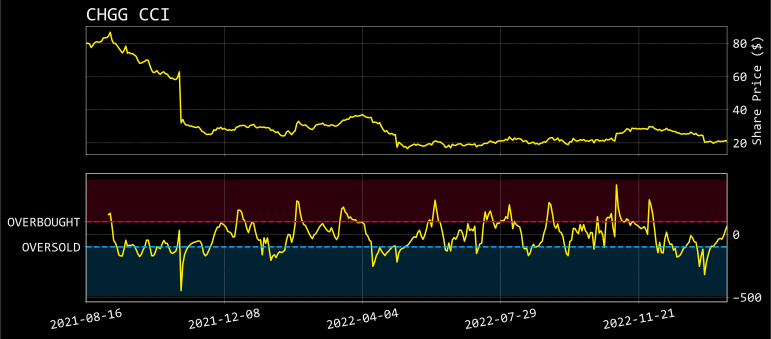

In [40]:
fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), sharex=True, dpi=150)
openbb.ta.cci_chart(ticker_data, symbol=symbol, external_axes=[ax, ax1])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
cci_chart = f.getvalue().decode("utf-8")

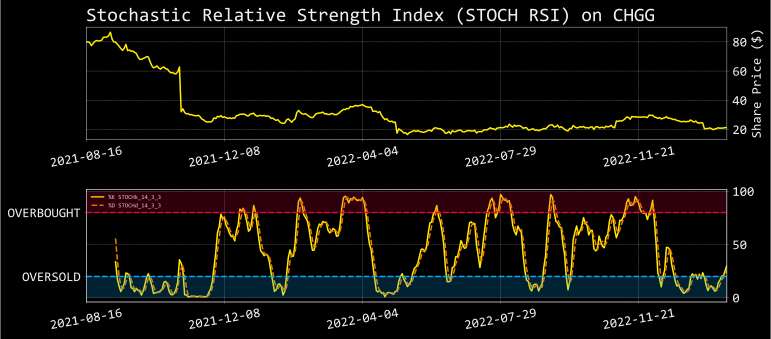

In [41]:
fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
ax2 = ax1.twinx()
openbb.ta.stoch_chart(ticker_data, symbol=symbol, external_axes=[ax, ax1, ax2])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
stoch_chart = f.getvalue().decode("utf-8")

In [42]:
balance_sheet = openbb.stocks.fa.balance(symbol, source="YahooFinance").style.format("{:,.0f}",subset=pd.IndexSlice[:,balance_sheet.columns])
balance_sheet

NameError: name 'balance_sheet' is not defined

In [ ]:
cash_flow = openbb.stocks.fa.cash(symbol, source="YahooFinance")
cash_flow = cash_flow.style.format("{:,.0f}",subset=pd.IndexSlice[:,cash_flow.columns])
cash_flow

In [44]:
df = pd.DataFrame(columns=["Ticker", "SBC", "Market Cap", "Employees"])

for ticker in universe:
    cash_flow = openbb.stocks.fa.cash(ticker, source="YahooFinance")
    SBC = cash_flow.loc["Stock-based compensation"].iloc[0]
    print(SBC)
    
    tickerinfo = yf.Ticker(ticker)
    info = tickerinfo.fast_info
    market_cap = info["market_cap"]
    market_cap
    
    try:
        employees = tickerinfo.info['fullTimeEmployees']
    except KeyError:
        employees = np.nan
    
    df = df.append({"Ticker": ticker, "SBC": SBC, "Market Cap": market_cap, "Employees": employees}, ignore_index=True)

    print("Done with ", ticker)

df['SBC/Market Cap'] = df['SBC'] / df['Market Cap']    
df['SBC/Employees'] = df['SBC'] / df['Employees']

131030000.0
Done with  CHGG
27607000.0
Done with  BFAM
12295000.0
Done with  LOPE
5525000.0
Done with  GHC
67872000.0
Done with  DUOL


In [45]:
df['SBC'] = df['SBC'].apply(lambda x: '{:,.0f}'.format(x/1000))
df['Market Cap'] = df['Market Cap'].apply(lambda x: '{:,.0f}'.format(x/1000))
df['SBC/Market Cap'] = df['SBC/Market Cap'].apply(lambda x: '{:,.1%}'.format(x))
df['SBC/Employees'] = df['SBC/Employees'].apply(lambda x: '{:,.0f}'.format(x/1))
df

,Ticker,SBC,Market Cap,Employees,SBC/Market Cap,SBC/Employees
0,CHGG,"131,030","2,156,950",2464,6.1%,"53,178"
1,BFAM,"27,607","4,423,939",25800,0.6%,"1,070"
2,LOPE,"12,295","3,488,486",3680,0.4%,"3,341"
3,GHC,"5,525","3,173,596",12102,0.2%,457
4,DUOL,"67,872","3,833,394",600,1.8%,"113,120"


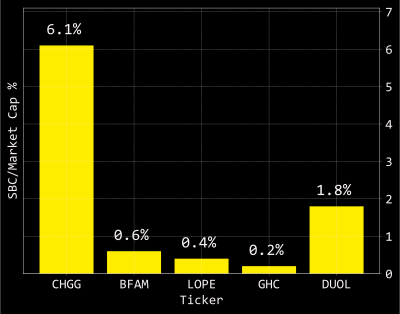

In [46]:
import matplotlib.pyplot as plt

# Remove the '%' sign from each value in the list
sbc_market_cap = [float(x.strip('%')) for x in df['SBC/Market Cap']]

# Plot the data
plt.bar(df['Ticker'], sbc_market_cap)
plt.xlabel('Ticker')
plt.ylabel('SBC/Market Cap %')
plt.ylim(0, max(sbc_market_cap) + 1)

# Add the value on top of each bar
for i, v in enumerate(sbc_market_cap):
    plt.text(i - 0.3, v + 0.3, str(v) + '%')

plt.show()



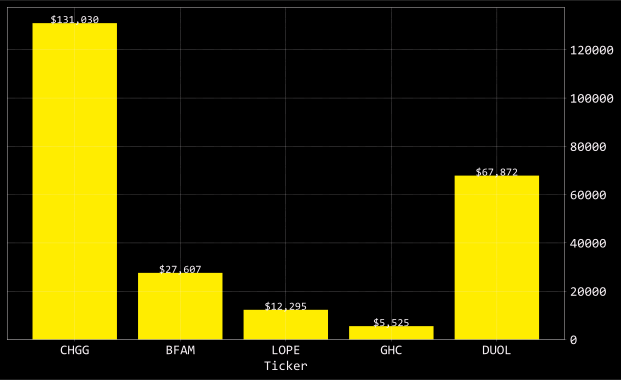

In [47]:
import matplotlib.pyplot as plt

y = df['SBC'].apply(lambda x: int(x.replace(',', '')))
x = df['Ticker']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)

# Add the value labels on top of the bars
for i, v in enumerate(y):
    ax.text(i, v, f'${v:,.0f}', ha='center', fontsize=11)

# Set the x-axis label
ax.set_xlabel('Ticker')

plt.show()



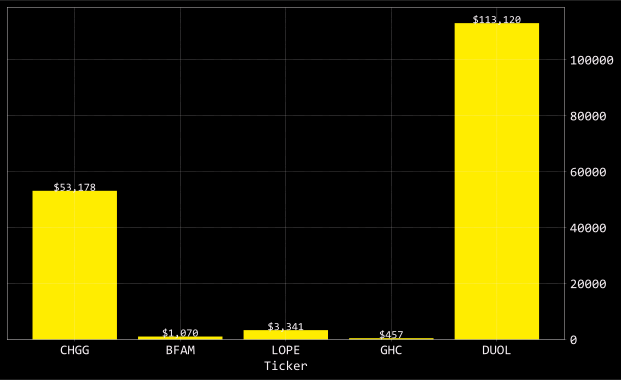

In [48]:
import numpy as np
import matplotlib.pyplot as plt

y = df['SBC/Employees'].apply(lambda x: int(x.replace(',', '')) if x != 'nan' else np.nan)
x = df['Ticker']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)

# Add the value labels on top of the bars
for i, v in enumerate(y):
    if np.isnan(v):
        continue
    ax.text(i, v, f'${v:,.0f}', ha='center', fontsize=11)

# Set the x-axis label
ax.set_xlabel('Ticker')

plt.show()



In [75]:
eps_surprises = openbb.stocks.fa.earnings(symbol)
eps_surprises

eps_surprises = eps_surprises[~eps_surprises['Earnings Date'].isna() &
                              ~eps_surprises['Surprise(%)'].isna()]
eps_surprises = eps_surprises.dropna()
eps_surprises = eps_surprises.dropna(how='all')
eps_surprises = eps_surprises[eps_surprises['EPS Estimate'] != '-']
eps_surprises = eps_surprises[eps_surprises['Surprise(%)'] != '-']
eps_surprises['Surprise(%)'] = eps_surprises['Surprise(%)'].astype(float) * 100
eps_surprises['Surprise(%)'] = eps_surprises['Surprise(%)'].round(1)
eps_surprises['Surprise(%)'] = eps_surprises['Surprise(%)'].astype(str) + '%'
# 
eps_surprises

,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
5,2023-02-06,0.38,0.4,5.0%
6,2022-11-01,0.14,0.21,54.4%
7,2022-08-04,0.33,0.36,8.8%
8,2022-05-02,0.24,0.32,31.7%
9,2022-02-07,0.34,0.38,12.4%
10,2021-11-01,0.2,0.2,0.5%
11,2021-08-09,0.37,0.43,15.6%


In [124]:
insider = openbb.stocks.ins.act(symbol)
insider 



,Shares Traded,Shares Held,Price,Type,Option,Insider
Date,,,,,,
2022-05-31,"2,887.00","246,697.00",18.74,Sell,No,Longo David
2022-05-31,"3,792.00","242,905.00",18.74,Sell,No,Schultz Nathan J.
2022-08-31,"2,888.00","272,975.00",19.95,Sell,No,ROSENSWEIG DANIEL
2022-08-31,"3,793.00","269,182.00",19.95,Sell,No,ROSENSWEIG DANIEL
2022-08-31,"1,538.00","186,616.00",19.95,Sell,No,Lem Esther
2022-08-31,"1,783.00","184,833.00",19.95,Sell,No,Lem Esther
2022-08-31,"6,217.00","1,784,956.00",19.95,Sell,No,Schultz Nathan J.
2022-08-31,"8,216.00","1,776,740.00",19.95,Sell,No,Schultz Nathan J.
2022-08-31,"2,888.00","240,017.00",19.95,Sell,No,BROWN ANDREW J


TypeError: tz must be string or tzinfo subclass.

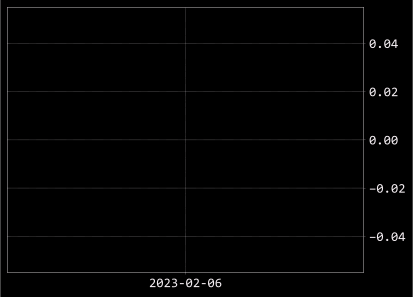

TypeError: 'value' must be an instance of str or bytes, not a float

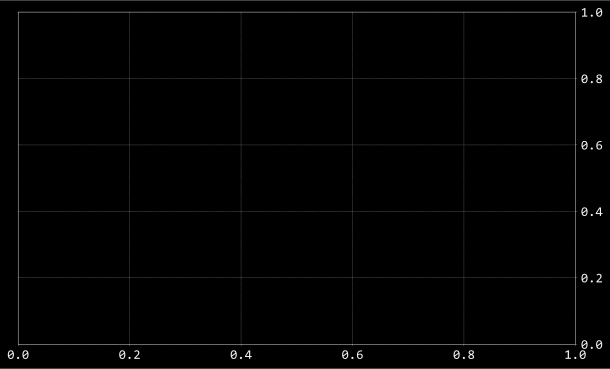